<a href="https://colab.research.google.com/github/satishgupta47972/FDS-lab1/blob/main/Face%20Mask%20Detection%20with%20Tensor%20Flow(miniProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FaceMask detection model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Build your CNN model using Keras to identify whether a person is wearing a faceMask or not**

###**1**.   **The Setup phase**


In [1]:
#---------------------------The import statments-----------------------------------------

import pandas as pd                               #reading, writing and manipulating the data (using tables)
import numpy as np                                #Library for linear algebra and some probabiltity (raw data) 
import tensorflow as tf                           #library for numerical computation that makes machine learning faster and easier
from tensorflow import keras                      #we may not add this since keras is already thier in tensorflow
from tensorflow.keras.models import Sequential    #To create the sequential layer
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout  #To create the model
from tensorflow.keras.optimizers import Adam      #Adam optimizer
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files

Here I will upload the dataset file called `"data"` that has 2 subfolders `"with"` and `"without`" and unzip




In [2]:
#upload file
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
#unzipping the folder
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

In [4]:
#delete the zip file as it is not needed anymore
!rm data.zip

In [5]:
# setting the batch size and the epochs

batch_size = 8
epochs = 30

Splitting the images (80% training and 20% 
validation) and Data augmanting it



In [6]:


directory = 'data'

img_datagen = ImageDataGenerator(validation_split=0.2,        # Splits the data into training (80%) and validation (20%)
                                   rescale = 1./255,            # Multiple the colors by a number between 0-1 to process data faster
                                   rotation_range=40,           #rotate the images
                                   width_shift_range=0.2,       #fraction of the total width
                                   height_shift_range = 0.2,    #fraction of the total height
                                   zoom_range = 0.2,            #float percent
                                   horizontal_flip=True,        #horizontal flip
                                   fill_mode='nearest')        #add new pixels when the image is rotated or shifted

train_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                shuffle = True,
                                seed=42,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set

validation_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                subset = 'validation')            # Specify this is training set



Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


**Display a batch of the images used in the training and thier labels**

In [7]:
#generate a batch of images and labels from the training set
imgs, labels = next(train_generator)

In [8]:
#plotting function

def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

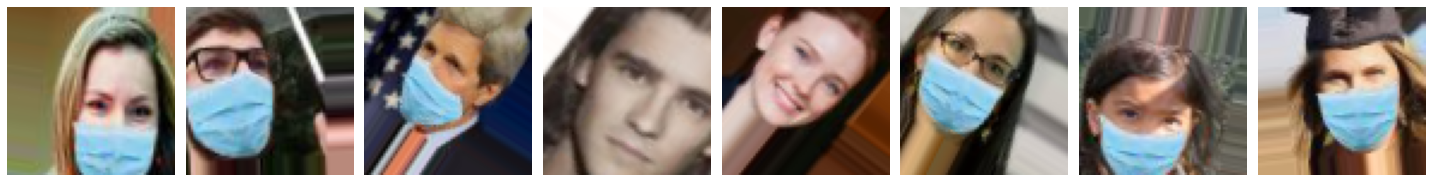

[0. 0. 0. 1. 1. 0. 0. 0.]


In [9]:
#displaying the images and thier labels where as 0 with mask and 1 without mask
plotImages(imgs);
print(labels);





###**2. Build and train the CNN**





Sequencial is a list of the layers of the model we want to create. Here it consists of

*   Conv2D Layer
> * **The filter** parameter means the number of this layer's output filters which is less in the early layers and more when we are closer to the prediction, [recommended to start up with 32,64,128 and the number varies according to the depth of the model]
> *   **The kernal_size** specifies the width and the height of the 2D convolution window [odd integer and depend on the image size if image size > 128x128 then use 5*5 if less use 3x3 or 1x1]
> *   **The activation** parameter refers to the type of activation function
> *   **The padding** parameter is enabled to zero-padding to preserve the spatial dimensions of the volume so the output volume size matches the input volume size
> *   **The input_shape** parameter has pixel high and pixel wide and have the 3 color channels: RGB

*   MaxPool2D Layer
> To pool and reduce the dimensionlaity of the data
> *   pool_size: max value over a 2x2 pooling window
> *  strides: how far the pooling window moves for each pooling step
*   Flatten Layer
> * flatten is used to flatten the input to a 1D vector then passed to dense

*   Dense Layer (The output layer)
> * **The units** parameter means that it has 2 nodes one for with and one for without because we want a binary output 
> *   **The activation** parameter we use the softmax activation function on our output so that the output for each sample is a probability distribution over the outputs of with and without mask






In [10]:
#create the model layers
#we have functional and sequential
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

#check out the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

Compile the model using the **Adam** optimizer with **learning rate** of `0.0001`, a **loss** of `binary_crossentropy`, and we'll look at `accuracy` as our performance **metric**.

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),         # remsprop, adadelta
              loss='binary_crossentropy',                   # mean_squared_error (regression task), categorical_crossentropy
              metrics=['accuracy'])                         #metrices to keep track off

We use the `train_generator` because we are now only training the data. The 
validation data is the `validation_generator` 


In [12]:
#Training the model
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator, batch_size= batch_size) 

Epoch 1/30
1002/1002 [==============================] - 52s 19ms/step - loss: 0.5269 - accuracy: 0.7162 - val_loss: 0.4045 - val_accuracy: 0.8192
Epoch 2/30
1002/1002 [==============================] - 19s 18ms/step - loss: 0.2848 - accuracy: 0.8783 - val_loss: 0.3040 - val_accuracy: 0.8706
Epoch 3/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.2491 - accuracy: 0.9003 - val_loss: 0.3937 - val_accuracy: 0.8492
Epoch 4/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.2204 - accuracy: 0.9117 - val_loss: 0.2716 - val_accuracy: 0.8911
Epoch 5/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.1912 - accuracy: 0.9319 - val_loss: 0.2458 - val_accuracy: 0.9126
Epoch 6/30
1002/1002 [==============================] - 18s 18ms/step - loss: 0.1621 - accuracy: 0.9428 - val_loss: 0.1783 - val_accuracy: 0.9366
Epoch 7/30
1002/1002 [==============================] - 19s 19ms/step - loss: 0.1427 - accuracy: 0.9492 - val_loss: 0.1665 -



### **3. Plotting the loss and accuracy of training vs validation**






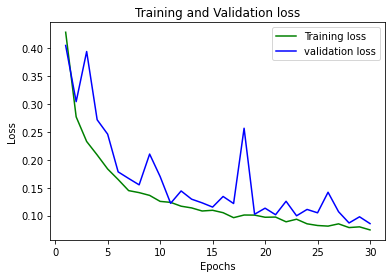

In [13]:
#Plotting the loss of validation and training 
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

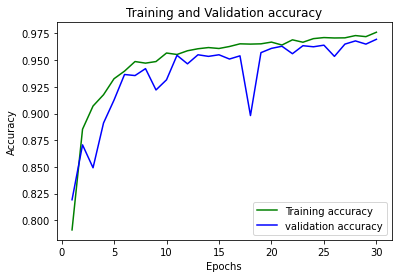

In [14]:
#Plotting the accuracy of validation and training 
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **4. Testing the CNN model**


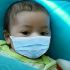



The person is wearing a mask. 



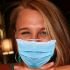



The person is wearing a mask. 



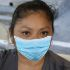



The person is wearing a mask. 



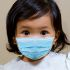



The person is wearing a mask. 



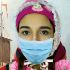



The person is wearing a mask. 



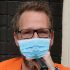



The person is wearing a mask. 



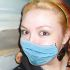



The person is wearing a mask. 



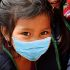



The person is wearing a mask. 



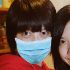



The person is wearing a mask. 



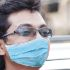



The person is wearing a mask. 



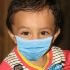



The person is wearing a mask. 



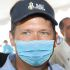



The person is wearing a mask. 



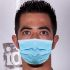



The person is wearing a mask. 



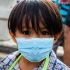



The person is wearing a mask. 



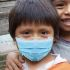



The person is wearing a mask. 



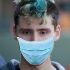



The person is wearing a mask. 



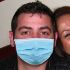



The person is wearing a mask. 



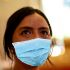



The person is wearing a mask. 



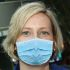



The person is wearing a mask. 



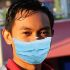



The person is wearing a mask. 



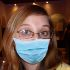



The person is wearing a mask. 



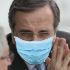



The person is wearing a mask. 



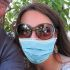



The person is wearing a mask. 



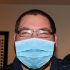



The person is wearing a mask. 



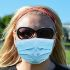



The person is wearing a mask. 



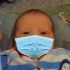



The person is wearing a mask. 



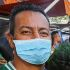



The person is wearing a mask. 



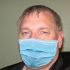



The person is wearing a mask. 



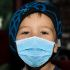



The person is wearing a mask. 



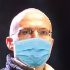



The person is wearing a mask. 



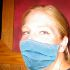



The person is wearing a mask. 



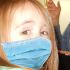



The person is wearing a mask. 



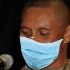



The person is wearing a mask. 



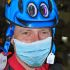



The person is wearing a mask. 



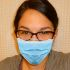



The person is wearing a mask. 



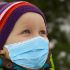



The person is wearing a mask. 



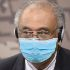



The person is wearing a mask. 



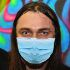



The person is wearing a mask. 



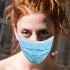



The person is wearing a mask. 



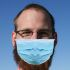



The person is wearing a mask. 



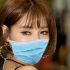



The person is wearing a mask. 



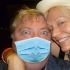



The person is wearing a mask. 



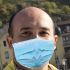



The person is wearing a mask. 



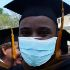



The person is wearing a mask. 



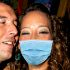



The person is wearing a mask. 



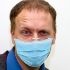



The person is wearing a mask. 



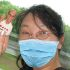



The person is wearing a mask. 



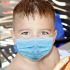



The person is wearing a mask. 



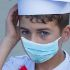



The person is wearing a mask. 



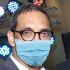



The person is wearing a mask. 



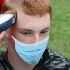



The person is wearing a mask. 



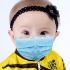



The person is wearing a mask. 



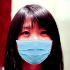



The person is wearing a mask. 



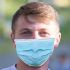



The person is wearing a mask. 



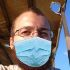



The person is wearing a mask. 



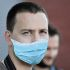



The person is wearing a mask. 



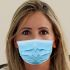



The person is wearing a mask. 



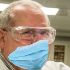



The person is wearing a mask. 



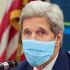



The person is wearing a mask. 



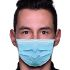



The person is wearing a mask. 



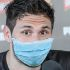



The person is wearing a mask. 



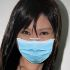



The person is wearing a mask. 



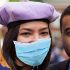



The person is wearing a mask. 



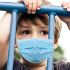



The person is wearing a mask. 



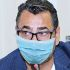



The person is wearing a mask. 



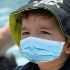



The person is wearing a mask. 



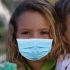



The person is wearing a mask. 



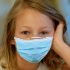



The person is wearing a mask. 



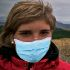



The person is wearing a mask. 



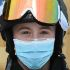



The person is wearing a mask. 



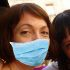



The person is wearing a mask. 



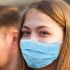



The person is wearing a mask. 



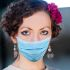



The person is wearing a mask. 



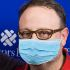



The person is wearing a mask. 



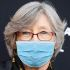



The person is wearing a mask. 



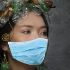



The person is wearing a mask. 



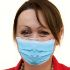



The person is wearing a mask. 



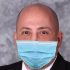



The person is wearing a mask. 



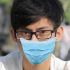



The person is wearing a mask. 



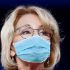



The person is wearing a mask. 



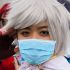



The person is wearing a mask. 



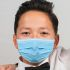



The person is wearing a mask. 



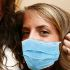



The person is wearing a mask. 



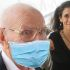



The person is wearing a mask. 



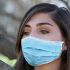



The person is wearing a mask. 



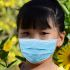



The person is wearing a mask. 



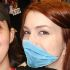



The person is wearing a mask. 



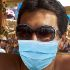



The person is wearing a mask. 



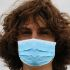



The person is wearing a mask. 



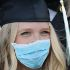



The person is wearing a mask. 



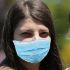



The person is wearing a mask. 



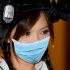



The person is wearing a mask. 



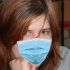



The person is wearing a mask. 



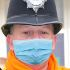



The person is wearing a mask. 



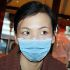



The person is wearing a mask. 



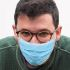



The person is wearing a mask. 



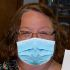



The person is wearing a mask. 



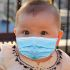



The person is wearing a mask. 



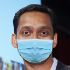



The person is wearing a mask. 



In [15]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,100):
  img_directory = '/content/data/with/'+str(i) + '.jpg'
  img_data = image.load_img(img_directory, target_size = (70, 70))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(classify[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")



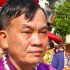



The person is not wearing a mask.



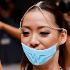



The person is not wearing a mask.



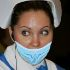



The person is not wearing a mask.



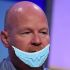



The person is not wearing a mask.



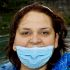



The person is not wearing a mask.



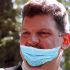



The person is not wearing a mask.



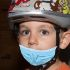



The person is not wearing a mask.



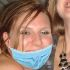



The person is not wearing a mask.



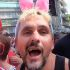



The person is not wearing a mask.



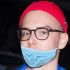



The person is not wearing a mask.



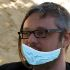



The person is not wearing a mask.



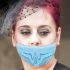



The person is not wearing a mask.



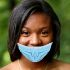



The person is not wearing a mask.



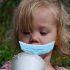



The person is not wearing a mask.



In [16]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1000,1014):
  img_directory = '/content/data/without/0'+str(i) + '_Mask_Mouth_Chin.jpg'
  #img_directory = /content/data '.jpg'str(i) + '.jpg'
  img_data = image.load_img(img_directory, target_size = (70, 70))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(classify[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")
    